In [1]:
#https://hgis.uw.edu/virus/
!wget http://hgis.uw.edu/virus/assets/virus.csv -O virus.csv

--2020-03-08 13:46:59--  http://hgis.uw.edu/virus/assets/virus.csv
Resolving hgis.uw.edu (hgis.uw.edu)... 140.142.15.76
Connecting to hgis.uw.edu (hgis.uw.edu)|140.142.15.76|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://hgis.uw.edu/virus/assets/virus.csv [following]
--2020-03-08 13:47:00--  https://hgis.uw.edu/virus/assets/virus.csv
Connecting to hgis.uw.edu (hgis.uw.edu)|140.142.15.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46329 (45K) [text/csv]
Saving to: ‘virus.csv’

virus.csv           100%[===================>]  45.24K   131KB/s    in 0.3s    

2020-03-08 13:47:01 (131 KB/s) - ‘virus.csv’ saved [46329/46329]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('virus.csv')
df = df.replace(np.nan,'0-0-0-0')
df.datetime = pd.to_datetime(df.datetime)
# df = df.set_index('datetime')
df = df.drop(['datetime'],axis=1)
df.head()

,anhui,beijing,chongqing,fujian,gansu,guangdong,guangxi,guizhou,hainan,hebei,...,alberta,manitoba,new brunswick,newfoundland and labrador,nova scotia,prince edward island,saskatchewan,northwest territories,nunavut,yukon
0,0-3,10,5,0,0,17-4,0-1,0-1,0-1,0-0-0-0,...,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0
1,1-4,14,6,1,0,26-1,2-1,1,4,1,...,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0
2,9-4,22,9,5-2,2,32-1-2,5,3,5-32,1-0-0-1,...,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0
3,15-4,36-0-1,27-13,10-2,2,53-0-2,23,3,8-32,2,...,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0
4,39-4,41-0-2,57,18-20,4,78-0-2,23,4,19,8,...,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0,0-0-0-0


In [4]:
def format_data(x):
    while len(x) < 4:
        x += ['0']
    return pd.Series(x,index=['cases','suspected','recoveries','deaths'])

# Compare country case history

Text(0, 0.5, 'Cases')

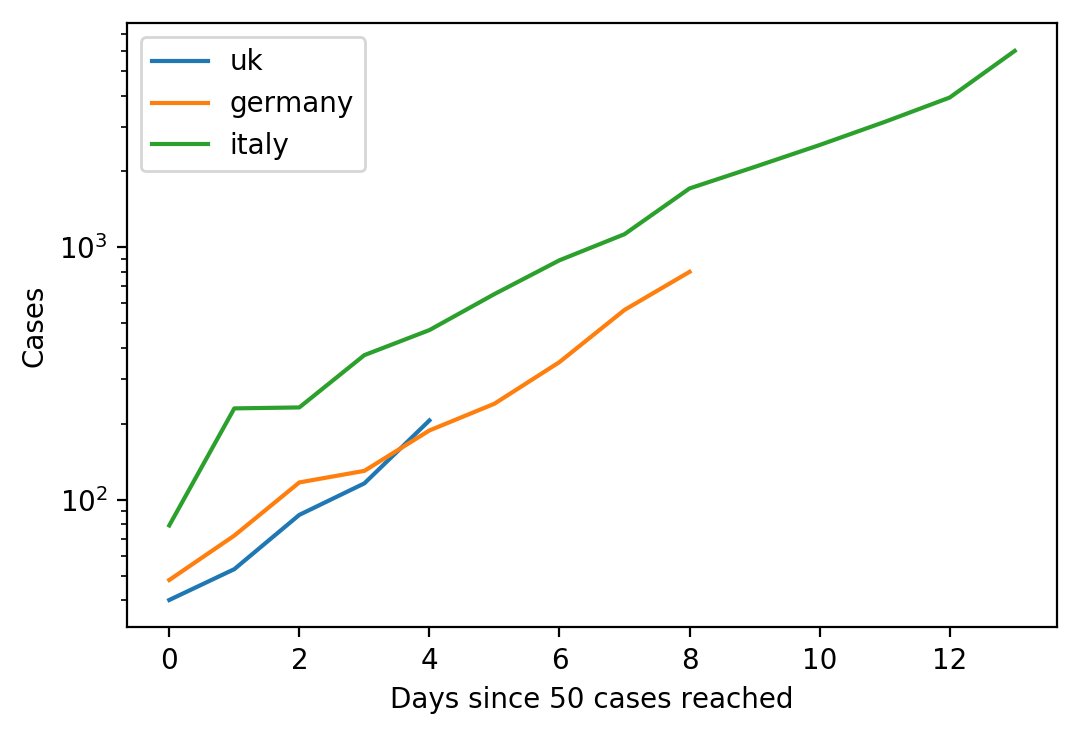

In [5]:
fig,ax = plt.subplots(dpi=200)

for country in ['uk','germany','italy']:
    df_country = df[country].str.split('-').apply(format_data)
    df_country = df_country.astype(int)
    df_country_50 = df_country.cases[df_country.cases >= 40].reset_index(drop=True)
    df_country_50.name = country
    if len(df_country_50) > 1:
        df_country_50.iloc[0:200].plot(ax=ax,logy=True)
    else:
        print('{} does not have enough datapoints (current cases = {})'.format(country,df_country.cases.iloc[-1]))
plt.legend()
plt.xlabel('Days since 50 cases reached')
plt.ylabel('Cases')

# Country comparison with added linear model

Text(0, 0.5, 'Cases')

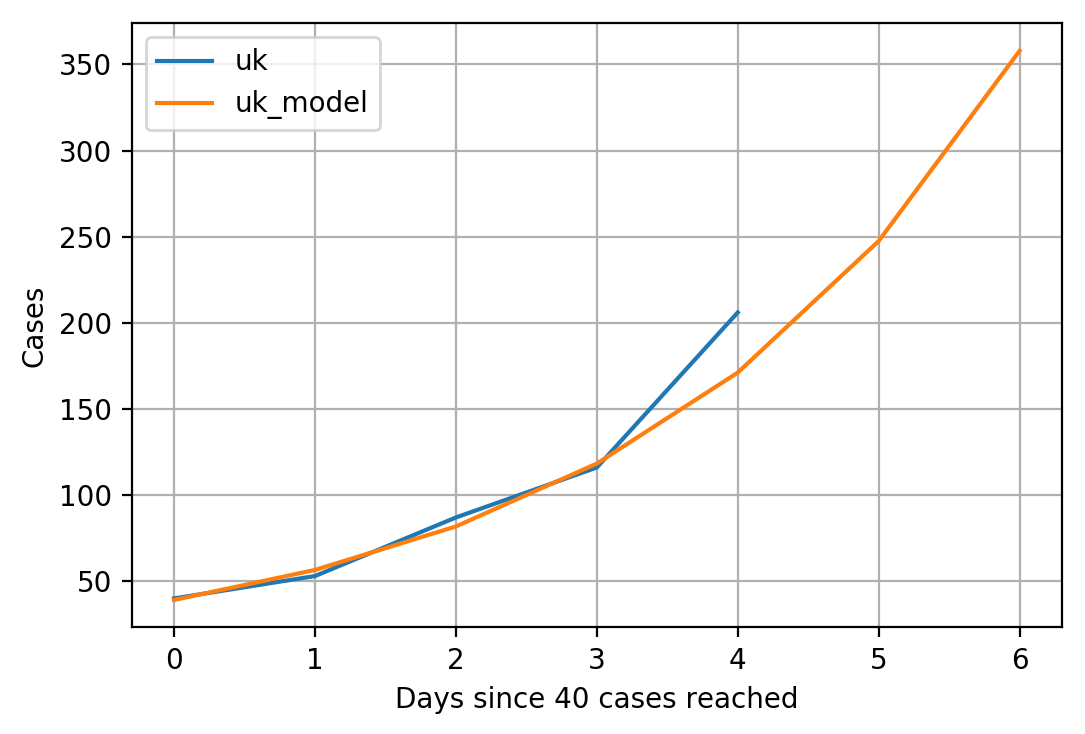

In [8]:
from sklearn.linear_model import LinearRegression

fig,ax = plt.subplots(dpi=200)
days=7
cases = 40
log=True
for country in ['uk']:
    df_country = df[country].str.split('-').apply(format_data)
    df_country = df_country.astype(int)
    df_country_50 = df_country.cases[df_country.cases >= cases].reset_index(drop=True)
    df_country_50.name = country
    if len(df_country_50) > 1:
        data = df_country_50.iloc[0:days]
        if log:
            data = np.log10(data)
            
        X = np.expand_dims(data.index.values[:-1],axis=1)
        y = np.expand_dims(data.values[:-1],axis=1)
        reg = LinearRegression().fit(X, y)
        pred_x = [[i] for i in range(days)]
        pred_y = reg.predict(pred_x)
        
        if not log:
            data.plot(ax=ax)
            plt.plot(pred_y)
        else:
            np.power(10,data).plot(ax=ax)
            plt.plot(np.power(10,pred_y),label=country+'_model')
        
    else:
        print('{} does not have enough datapoints (current cases = {})'.format(country,df_country.cases.iloc[-1]))

plt.xticks(pred_x)
plt.legend()
plt.grid()
plt.xlabel('Days since {} cases reached'.format(cases))
plt.ylabel('Cases')